In [124]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import ntpath
import os
import shutil
from glob import glob

def get_channel_name(data_list):
    """
    Extracts list of channel names from a filename list
    """
    names_list = [s.split('_')[0] for s in data_list]
    names_list = [s.split('\\')[-1] for s in names_list]
    return names_list

def convert_filename(filename):
    """
    Replaces Unicode characters in channel names, throws away spaces
    """
    #print(filename)
    filename_split = filename.rsplit('_', 1)
    name = filename_split[0].split('\\')[-1]
    if name == 'Новый':
        name = 'Novy'
    elif name == '5 канал':
        name = '5channel'
    elif name == 'K1':
        name = 'K1'
    elif name == 'K2':
        name = 'K2'
    elif name == 'TET':
        name = 'TET'
    elif name == 'АТР':
        name = 'ATR'
    elif name == 'Бигуди':
        name = 'Bigudi'
    elif name == 'Интер':
        name = 'Inter'
    elif name == 'КГТРК':
        name = 'KGTRK'
    elif name == 'Культура':
        name = 'Culture'
    elif name == 'МАТЧ':
        name = 'Match'
    elif name == 'НТВ':
        name = 'NTV'
    elif name == 'НТН':
        name = 'NTN'
    elif name == 'ОЦЕ':
        name = 'OCE'
    elif name == 'Первый Канал':
        name = 'Channel1Rus'
    elif name == 'Первый Канал Европа':
        name = 'Channel1RusEur'
    elif name == 'Первый национальный':
        name = 'FirstNationalUkr'
    elif name == 'Перший Діловий':
        name = 'FirstDilovyiUkr'
    elif name == 'Плюс Плюс':
        name = 'PlusPlus'
    elif name == 'Прямий':
        name = 'Priamyi'
    elif name == 'Піксель':
        name = 'Pixel'
    elif name == 'Рада':
        name = 'Rada'
    elif name == 'Рен-ТВ':
        name = 'RENTV'
    elif name == 'Россия-24':
        name = 'Russia24'
    elif name == 'СТБ':
        name = 'STB'
    elif name == 'СТС':
        name = 'STS'
    elif name == 'Солнце':
        name = 'Solntse'
    elif name == 'ТНТ':
        name = 'TNT'
    elif name == 'ТРК Украина':
        name = 'TRKUkraine'
    elif name == 'Телеканал Россия':
        name = 'RussiaTVChannel'
    elif name == 'Униан':
        name = 'Unian'
    name = name.replace(' ', '')
    return name + '_' + filename_split[1]

def create_SLM_labels(files_list):
    """
    Returns list of labels SLM/NONSLM from list of filenames
    """
    return [1 if name in ('ICTV', 'Novy', 'STB', 'M1', 'M2', 'OCE') else 0 for name in files_list]

def make_train_test_folders(path):
    data = np.array(glob(path + '/*'))
    #dog_files = np.array(data['filenames'])
    #dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    names_list = get_channel_name(data)
    print(np.unique(names_list), len(np.unique(names_list)))
    labels_list = create_SLM_labels(names_list)
    #print(len(labels_list))
    if (not (os.path.isdir(path + '/train'))) or (not ((os.path.isdir(path + '/test')))):
        train_list, test_list, train_labels, test_labels = train_test_split(data, labels_list, test_size = .25)
        print(len(train_list), len(train_labels), len(test_list), len(test_labels))
        names_list = get_channel_name(test_list)
        print(len(np.unique(names_list)))
        os.makedirs(path + '/train')
        os.makedirs(path + '/test')
        for file in test_list:
            shutil.copy2(file, path + '/test/' + convert_filename(file))
        for file in train_list:
            shutil.copy2(file, path + '/train/' + convert_filename(file))
    else:
        train_list = shuffle(np.array(glob(path + '/train/*')))
        train_labels = create_SLM_labels(get_channel_name(train_list))
        test_list = shuffle(np.array(glob(path + '/test/*')))
        test_labels = create_SLM_labels(get_channel_name(test_list))
    #print(test_list[4], test_list[44], test_list[444], test_list[4444])
    #print(test_labels[4], test_labels[44], test_labels[444], test_labels[4444])
    #print(train_list[4], train_list[44], train_list[444], train_list[4444])
    #print(train_labels[4], train_labels[44], train_labels[444], train_labels[4444])
    #train_list = [s.replace('/', '\\') for s in train_list]
    #test_list = [s.replace('/', '\\') for s in train_list]
    return data, train_list, test_list, train_labels, test_labels

In [126]:
dataset_path = 'D:\Screenshots'

train_files, train_list, test_list, train_labels, test_labels = make_train_test_folders(dataset_path)
new_names_list = get_channel_name(train_list)
print(np.unique(new_names_list), len(np.unique(new_names_list)))

['1+1' '2+2' '5 канал' 'Al Jazeera' 'BBC World News Europe' 'Black Sea TV'
 'CNN International' 'DW' 'EXPLORE' 'Enter Film' 'EuroNews' 'Eurosport'
 'Eurosport 2' 'HISTORY' 'ICTV' 'K1' 'K2' 'M1' 'M2' 'Mega' 'Music BOX'
 'NATURE' 'News24' 'OTV' 'TET' 'TV1000' 'TVE' 'ZOOM' 'test' 'train' 'АТР'
 'Бигуди' 'Интер' 'КГТРК' 'Культура' 'МАТЧ' 'НТВ' 'НТН' 'Новый' 'ОЦЕ'
 'Первый Канал' 'Первый Канал Европа' 'Первый национальный'
 'Перший Діловий' 'Плюс Плюс' 'Прямий' 'Піксель' 'Рада' 'Рен-ТВ'
 'Россия-24' 'СТБ' 'СТС' 'Солнце' 'ТНТ' 'ТРК Украина' 'Телеканал Россия'
 'Униан'] 57
['1+1' '2+2' '5channel' 'ATR' 'AlJazeera' 'BBCWorldNewsEurope' 'Bigudi'
 'BlackSeaTV' 'CNNInternational' 'Channel1Rus' 'Channel1RusEur' 'Culture'
 'DW' 'EXPLORE' 'EnterFilm' 'EuroNews' 'Eurosport' 'Eurosport2'
 'FirstDilovyiUkr' 'FirstNationalUkr' 'HISTORY' 'ICTV' 'Inter' 'K1' 'K2'
 'KGTRK' 'M1' 'M2' 'Match' 'Mega' 'MusicBOX' 'NATURE' 'NTN' 'NTV' 'News24'
 'Novy' 'OCE' 'OTV' 'Pixel' 'PlusPlus' 'Priamyi' 'RENTV' 'Rada' 'Russ



  3%|▎         | 428/13749 [03:10<1:38:57,  2.24it/s]




 19%|█▉        | 2609/13749 [00:22<01:35, 116.31it/s]

(60, 150, 3)


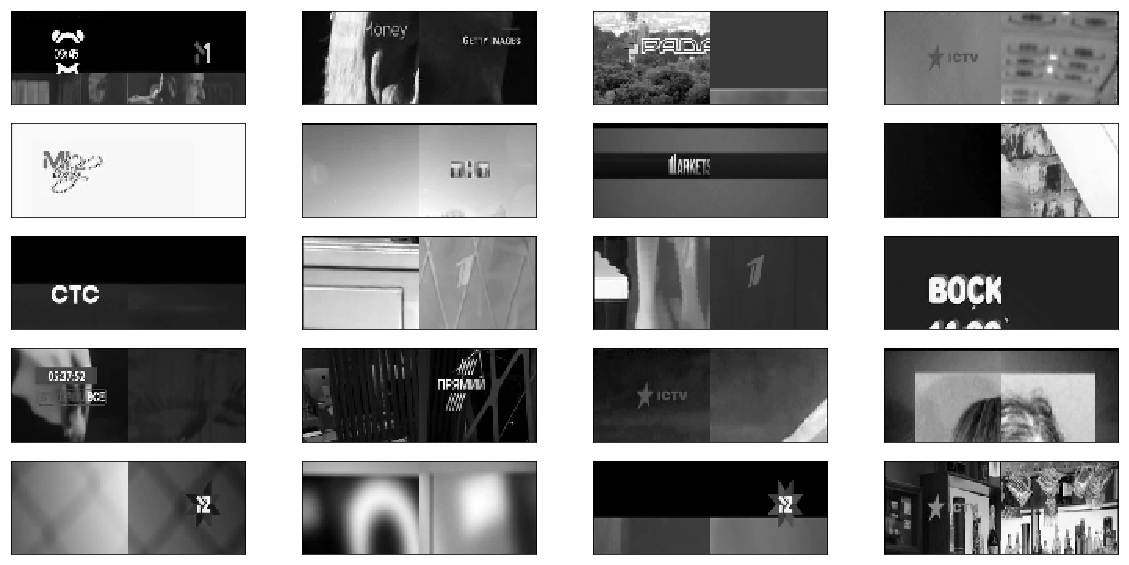

In [161]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.cvtColor(img, cv2.RGB2GRAY)
    ax.imshow(img, cmap = 'gray')
    #ax.imshow(img)
    
fig = plt.figure(figsize=(20, 10))
addon = 9087
n_images = 20
for i in range(n_images):
    #print(train_list[addon + i])
    ax = fig.add_subplot(n_images / 4, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_list[addon + i], ax)
img = cv2.imread(train_list[1])
print(img.shape)

In [162]:
from keras.preprocessing import image
from tqdm import tqdm
import pickle
def img_to_tensor(img_path):
    # loads RGB image as PIL, convert to grayscale
    img = image.load_img(img_path, target_size=(60, 150), grayscale = True)
    # convert PIL.Image.Image type to 3D tensor with shape (60, 150, 1)
    x = image.img_to_array(img)
    #print(x.shape)
    # convert 3D tensor to 4D tensor with shape (1, 60, 150, 1) and return 4D tensor
    return np.expand_dims(x, axis=0)

def get_image_set(image_files):
    list_of_tensors = [img_to_tensor(img_path) for img_path in tqdm(image_files)]
    return np.vstack(list_of_tensors)

if os.path.isfile(dataset_path + '/X_train_dump.p'):
    print('Loading preprocessed TRAIN images from disk')
    X_train = pickle.load(open(dataset_path + '/X_train_dump.p', 'rb'))
    print('Done')
else:
    X_train = get_image_set(train_list).astype('float32') / 255
    print('Saving preprocessed TRAIN images')
    pickle.dump(X_train, open(dataset_path + '/X_train_dump.p', 'wb'))
    print('Complete')
    
if os.path.isfile(dataset_path + '/X_test_dump.p'):
    print('Loading preprocessed TEST images from disk')
    X_test = pickle.load(open(dataset_path + '/X_test_dump.p', 'rb'))
    print('Done')
else:
    X_test = get_image_set(test_list).astype('float32') / 255
    print('Saving preprocessed TEST images')
    pickle.dump(X_test, open(dataset_path + '/X_test_dump.p', 'wb'))
    print('Complete')


Loading preprocessed TRAIN images from disk
Done






  0%|          | 0/13749 [00:00<?, ?it/s]



  0%|          | 45/13749 [00:00<00:31, 439.78it/s]



  1%|          | 110/13749 [00:00<00:25, 541.36it/s]



  1%|▏         | 179/13749 [00:00<00:23, 588.72it/s]



  2%|▏         | 239/13749 [00:00<00:22, 591.12it/s]



  2%|▏         | 300/13749 [00:00<00:22, 592.79it/s]



  3%|▎         | 363/13749 [00:00<00:22, 598.66it/s]



  3%|▎         | 429/13749 [00:00<00:21, 606.69it/s]



  4%|▎         | 497/13749 [00:00<00:21, 614.81it/s]



  4%|▍         | 558/13749 [00:00<00:21, 611.40it/s]



  4%|▍         | 618/13749 [00:01<00:22, 576.18it/s]



  5%|▍         | 672/13749 [00:01<00:23, 562.38it/s]



  5%|▌         | 732/13749 [00:01<00:23, 564.95it/s]



  6%|▌         | 802/13749 [00:01<00:22, 574.32it/s]



  6%|▋         | 870/13749 [00:01<00:22, 581.08it/s]



  7%|▋         | 940/13749 [00:01<00:21, 587.87it/s]



  7%|▋         | 1005/13749 [00:01<00:21, 591.26it/s]



  8%|▊         | 1075/13749 [00:01<00:21, 596.89it/s]



Saving preprocessed TEST images
Complete


In [163]:
print(X_train.shape, X_test.shape)

(41247, 60, 150, 1) (13749, 60, 150, 1)


In [175]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [176]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (60, 150, 1)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 60, 150, 16)       80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 75, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 75, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 37, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 37, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 37, 64)        8256      
__________

In [177]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [181]:
from keras.callbacks import ModelCheckpoint  

epochs = 5

checkpointer = ModelCheckpoint(filepath= dataset_path + '/weights_best_3layersCNN.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_split=.2,
          epochs=epochs, batch_size=10, callbacks=[checkpointer], verbose=2)

Train on 32997 samples, validate on 8250 samples
Epoch 1/5
Epoch 00001: val_loss improved from inf to 0.32000, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 219s - loss: 0.3068 - acc: 0.8920 - val_loss: 0.3200 - val_acc: 0.8895
Epoch 2/5
Epoch 00002: val_loss improved from 0.32000 to 0.28017, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 216s - loss: 0.2954 - acc: 0.8962 - val_loss: 0.2802 - val_acc: 0.8932
Epoch 3/5
Epoch 00003: val_loss did not improve
 - 218s - loss: 0.2759 - acc: 0.9020 - val_loss: 0.2843 - val_acc: 0.9080
Epoch 4/5
Epoch 00004: val_loss improved from 0.28017 to 0.26787, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 209s - loss: 0.2570 - acc: 0.9116 - val_loss: 0.2679 - val_acc: 0.9202
Epoch 5/5
Epoch 00005: val_loss improved from 0.26787 to 0.22898, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 212s - loss: 0.2404 - acc: 0.9216 - val_loss: 0.2290 - val_acc: 0.9417


In [184]:
model.load_weights(dataset_path + '/weights_best_3layersCNN.hdf5')

In [189]:
print(model.metrics_names)
model.evaluate(X_test, y_test, verbose = 0)[1]

['loss', 'acc']


0.9402865663000658

1 : [[ 1.  0.]] True label: NONSLM
2 : [[ 1.  0.]] True label: SLM
3 : [[ 1.  0.]] True label: NONSLM
4 : [[ 1.  0.]] True label: NONSLM
5 : [[ 1.  0.]] True label: SLM
6 : [[ 1.  0.]] True label: NONSLM
7 : [[ 1.  0.]] True label: NONSLM
8 : [[ 1.  0.]] True label: NONSLM
9 : [[ 1.  0.]] True label: NONSLM
10 : [[ 1.  0.]] True label: NONSLM
11 : [[ 1.  0.]] True label: NONSLM
12 : [[ 1.  0.]] True label: NONSLM
13 : [[ 1.  0.]] True label: NONSLM
14 : [[ 1.  0.]] True label: NONSLM
15 : [[ 1.  0.]] True label: NONSLM
16 : [[ 1.  0.]] True label: NONSLM
17 : [[ 1.  0.]] True label: NONSLM
18 : [[ 1.  0.]] True label: NONSLM
19 : [[ 1.  0.]] True label: NONSLM
20 : [[ 1.  0.]] True label: NONSLM
21 : [[ 1.  0.]] True label: NONSLM
22 : [[ 1.  0.]] True label: NONSLM
23 : [[  1.00000000e+00   2.37004798e-17]] True label: NONSLM
24 : [[ 1.  0.]] True label: NONSLM
25 : [[ 1.  0.]] True label: NONSLM
26 : [[ 1.  0.]] True label: NONSLM
27 : [[ 1.  0.]] True label: NONSLM
28 : [[ 1.  0.]] 

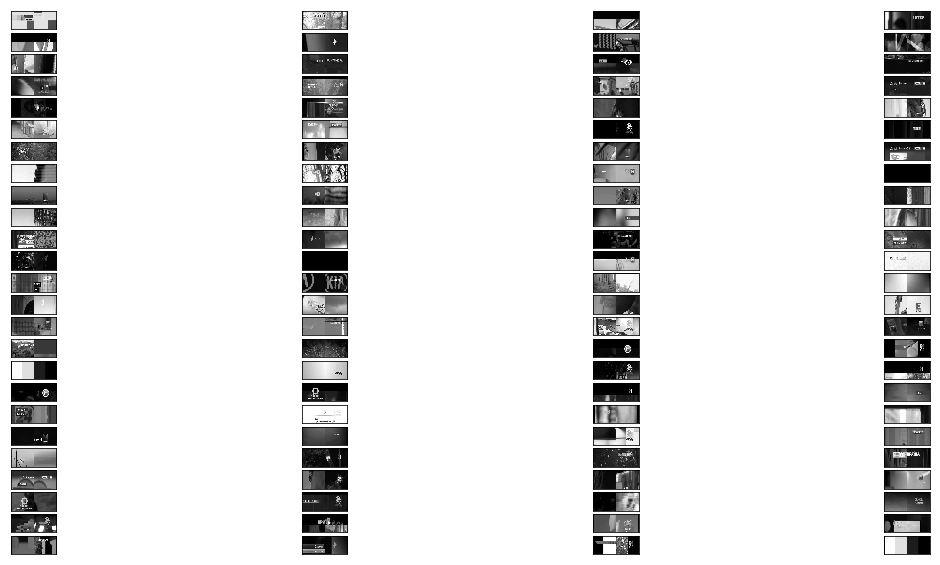

In [204]:
#prediction pipeline
fig = plt.figure(figsize=(20, 10))
n_images = 100
addon = 101
for i in range(n_images):
    #print(train_list[addon + i])
    ax = fig.add_subplot(n_images / 4, 4, i + 1, xticks=[], yticks=[])
    visualize_img(test_list[addon + i], ax)
for i in range(n_images):
    print(i+1, ':', model.predict(img_to_tensor(test_list[addon + i])), 'True label:', test_labels[addon + i])